# Mini project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning. The cleansing of this dataset will be a great start for you to further play with this Kaggle Competition if you have more interest and time.

This step-by-step mini project will illustrate you various ways to impute missing values.

In [106]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [107]:
ls

Data_Cleaning_Demo.ipynb*     crawl_indeed_tutorial_.ipynb*
MiniProject2.ipynb            properties_2016.csv.zip*
MiniProject2_Answer.ipynb     properties_2017.csv
Untitled.ipynb                properties_2017.csv.zip*
Week2Notebook20180128.ipynb   train_2017.csv


In [108]:
train = pd.read_csv('train_2017.csv')
properties = pd.read_csv('properties_2017.csv')

/Users/lucydiamondsky/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [109]:
train.head(5)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [110]:
properties.head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [111]:
df_train = pd.concat([train, properties],axis=1)

In [112]:
df_train.head(5)

,parcelid,logerror,transactiondate,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519.0,0.025595,2017-01-01,10754147,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,17052889.0,0.055619,2017-01-01,10759547,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,14186244.0,0.005383,2017-01-01,10843547,NaN,NaN,NaN,0.0,0.0,5.0,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,12177905.0,-0.103410,2017-01-01,10859147,NaN,NaN,NaN,0.0,0.0,3.0,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10887214.0,0.006940,2017-01-01,10879947,NaN,NaN,NaN,0.0,0.0,4.0,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [113]:
df_train= df_train.drop(['parcelid', 'transactiondate'],axis=1)

In [114]:
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.025595,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,0.055619,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,0.005383,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,-0.103410,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,0.006940,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [115]:
missing_df = pd.DataFrame(df_train.isnull().sum())
missing_df = missing_df.reset_index()
missing_df.rename(columns={ missing_df.columns[1]: "missing_count", missing_df.columns[0]: "feature"}, inplace=True)
missing_df

,feature,missing_count
0,logerror,2907604
1,airconditioningtypeid,2169855
2,architecturalstyletypeid,2979156
3,basementsqft,2983590
4,bathroomcnt,2957
5,bedroomcnt,2945
6,buildingclasstypeid,2972486
7,buildingqualitytypeid,1043822
8,calculatedbathnbr,117156
9,decktypeid,2967838


#### 3.(b) Draw a horizontal bar plot to visualize it. 

In [116]:
missing_df = df_train.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

In [117]:
missing_df.shape

(58, 2)

In [118]:
missing_df

,column_name,missing_count
37,regionidcounty,2932
24,latitude,2932
25,longitude,2932
35,rawcensustractandblock,2932
17,fips,2932
33,propertylandusetypeid,2932
52,assessmentyear,2933
5,bedroomcnt,2945
4,bathroomcnt,2957
40,roomcnt,2969


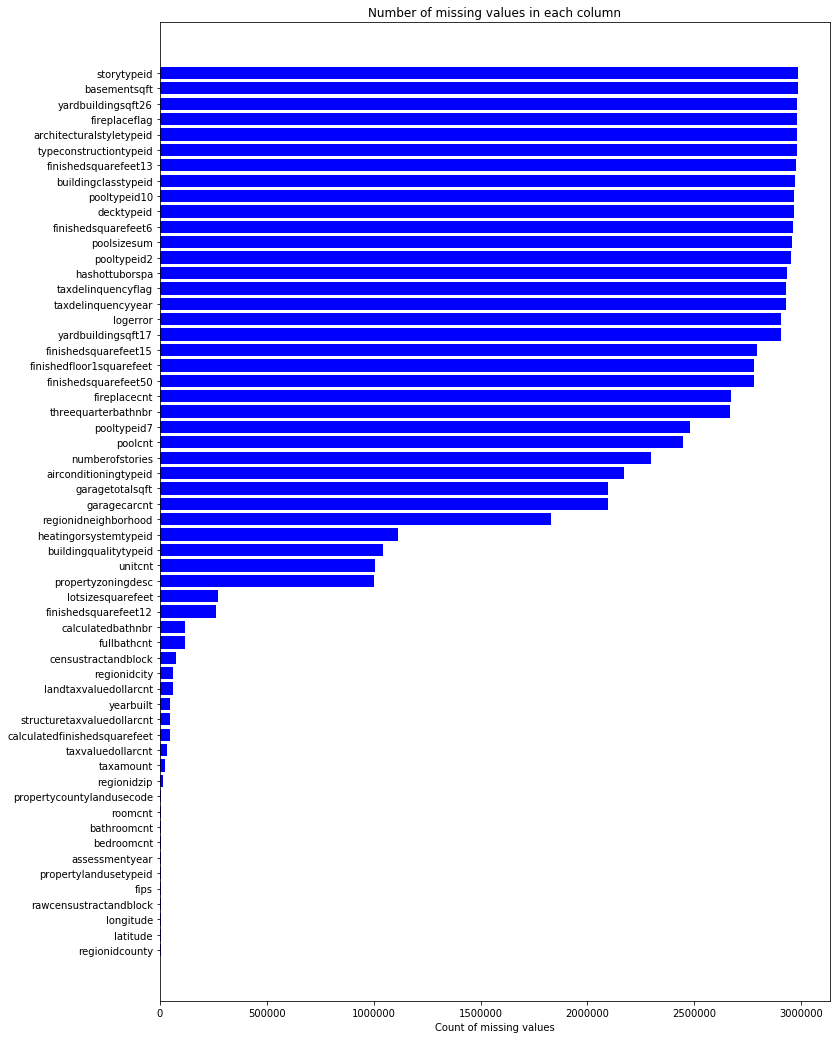

In [119]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [120]:
correlations = df_train.corr()
correlations

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
logerror,1.000000,0.013596,0.020628,0.163582,0.003579,0.003314,0.063531,-0.001071,0.002864,NaN,...,-0.075707,-0.003228,0.003764,0.005645,0.003800,-0.005857,0.001423,0.004694,-0.013900,0.002471
airconditioningtypeid,0.013596,1.000000,-0.043510,NaN,-0.056293,0.052546,-0.102100,-0.067789,-0.037528,NaN,...,NaN,-0.044055,0.194663,-0.000068,0.014659,0.003387,0.024973,0.000657,-0.002083,0.822055
architecturalstyletypeid,0.020628,-0.043510,1.000000,NaN,0.032060,0.038203,NaN,NaN,0.032078,NaN,...,NaN,0.010203,-0.021448,0.003030,0.003886,NaN,0.003657,-0.005617,0.081641,-0.014409
basementsqft,0.163582,NaN,NaN,1.000000,0.397658,0.352437,NaN,NaN,0.405392,NaN,...,0.296268,0.367551,0.125758,0.481196,0.450068,-0.042790,0.374859,0.448335,-0.334451,0.190944
bathroomcnt,0.003579,-0.056293,0.032060,0.397658,1.000000,0.699411,-0.018907,0.504397,1.000000,NaN,...,-0.014114,0.332190,0.304577,0.250899,0.307743,0.019234,0.275638,0.304536,0.030837,-0.015826
bedroomcnt,0.003314,0.052546,0.038203,0.352437,0.699411,1.000000,0.002633,0.132064,0.629650,NaN,...,-0.043149,0.048354,0.148038,0.116213,0.138356,0.023767,0.112545,0.144009,0.001256,-0.012018
buildingclasstypeid,0.063531,-0.102100,NaN,NaN,-0.018907,0.002633,1.000000,-0.137089,0.048711,NaN,...,NaN,-0.091038,-0.110391,-0.165696,-0.185836,-0.000038,-0.204130,-0.190478,-0.019608,0.042497
buildingqualitytypeid,-0.001071,-0.067789,NaN,NaN,0.504397,0.132064,-0.137089,1.000000,0.502487,NaN,...,NaN,0.567699,0.098343,0.416079,0.343297,0.001830,0.256534,0.340706,0.054285,0.000435
calculatedbathnbr,0.002864,-0.037528,0.032078,0.405392,1.000000,0.629650,0.048711,0.502487,1.000000,NaN,...,0.054883,0.367604,0.375098,0.565642,0.457812,-0.005784,0.339888,0.463126,0.042405,0.013248
decktypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


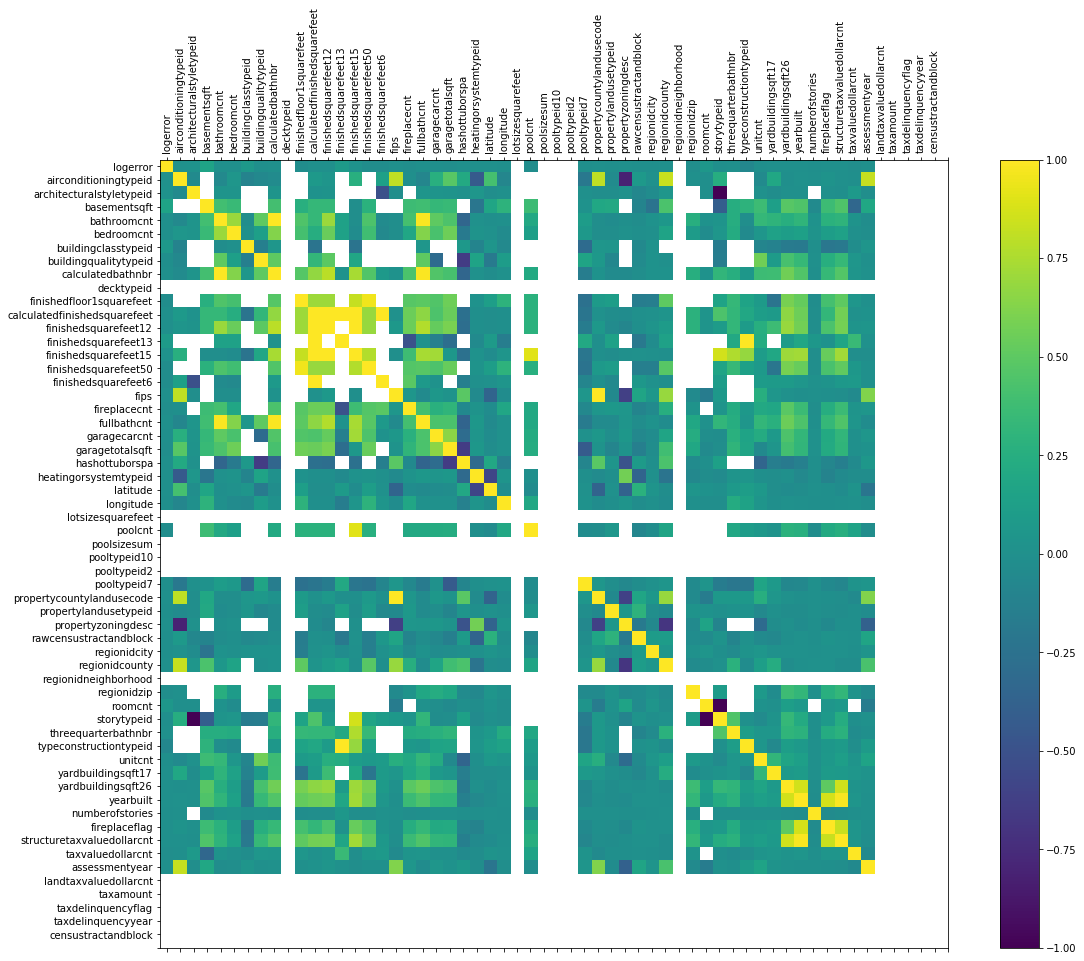

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,59,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(missing_key, rotation = 90)
ax.set_yticklabels(missing_key)
CorrelationsMatrix = plt.gcf()
CorrelationsMatrix.set_size_inches(18.5, 14.5)

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [122]:
dropcols = []
for i in range(0, len(correlations)):
    for x in range (0, i):
        if (abs(correlations.iloc [x, i]) > 0.7 and abs(correlations.iloc [x, i]) < 1):
            dropcols.append(correlations.iloc [x, i])
dropcols

[0.70707568995496972,
 0.70048927844991438,
 0.79114034113141762,
 0.70673422360935345,
 0.73773070137295782,
 0.82127134387227818,
 0.99999533653382766,
 0.95675356205380446,
 0.76577829698892197,
 0.811876590583683,
 0.98727501640314563,
 0.98727501640314563,
 0.77185985799553047,
 0.73773035488939698,
 0.7256557163757652,
 0.90756729642247069,
 0.81099001152288908,
 0.99994051007483109,
 -0.81187659058275707,
 0.83390653809588777,
 0.8622131827902022,
 0.76196852450500152,
 0.71067064707348193,
 0.72332723446708824,
 0.86009472781766738,
 0.87197668600794154,
 0.72016737965419397,
 0.85738558689526356,
 0.97918584016959964,
 0.83505402760064085,
 0.82205474759956509]

In [123]:
dropcols = []
for col in correlations.columns:
    for ind in correlations.index:
        if (abs(correlations.loc[ind, col]) > 0.7 and abs(correlations.loc[col, ind]) <1):
            dropcols.append(col)
dropcols = list(set(dropcols))
dropcols

['finishedfloor1squarefeet',
 'roomcnt',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'regionidcounty',
 'finishedsquarefeet12',
 'calculatedfinishedsquarefeet',
 'fips',
 'fullbathcnt',
 'taxvaluedollarcnt',
 'rawcensustractandblock',
 'garagecarcnt',
 'bathroomcnt',
 'calculatedbathnbr',
 'finishedsquarefeet50',
 'yardbuildingsqft17',
 'censustractandblock',
 'airconditioningtypeid',
 'landtaxvaluedollarcnt',
 'taxamount',
 'finishedsquarefeet15',
 'poolsizesum']

In [124]:
dropcols2 = []
dropcols2.append('finishedsquarefeet12')
dropcols2.append('finishedsquarefeet13')
dropcols2.append('finishedsquarefeet15')
dropcols2.append('finishedsquarefeet6')
dropcols2.append('finishedsquarefeet50')
dropcols2.append('calculatedbathnbr')
dropcols2.append('fullbathcnt')

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [125]:
index = df_train.hashottuborspa.isnull()
df_train.loc[index,'hashottuborspa'] = "None"

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [126]:
index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2'] = 0

In [127]:
index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

In [128]:
index = df_train.pooltypeid10.isnull()
df_train.loc[index,'pooltypeid10'] = 0

In [129]:
index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0

(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [130]:
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index,'taxdelinquencyflag'] = "None"

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [131]:
index = df_train.garagecarcnt.isnull()
df_train.loc[index,'garagecarcnt'] = 0

In [132]:
index = df_train.garagetotalsqft.isnull()
df_train.loc[index,'garagetotalsqft'] = 0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [133]:
poolsizesum_median = df_train.loc[df_train['poolcnt'] > 0, 'poolsizesum'].median()
poolsizesum_median

495.0

In [134]:
df_train.loc[(df_train['poolcnt'] > 0) & (df_train['poolsizesum'].isnull()), 'poolsizesum'] = poolsizesum_median

#If it doesn't have a pool then poolsizesum is 0 by default
df_train.loc[(df_train['poolcnt'] == 0), 'poolsizesum'] = 0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [135]:
df_train['fireplaceflag']= "No"
df_train.loc[df_train['fireplacecnt']>0,'fireplaceflag']= "Yes"

index = df_train.fireplacecnt.isnull()
df_train.loc[index,'fireplacecnt'] = 0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [136]:
index = df_train.airconditioningtypeid.isnull()
df_train.loc[index,'airconditioningtypeid'] = 1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [137]:
index = df_train.heatingorsystemtypeid.isnull()
df_train.loc[index,'heatingorsystemtypeid'] = 2

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [138]:
missingvalues_prop = (df_train.isnull().sum()/len(df_train)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)
missingvaluescols = missingvalues_prop[missingvalues_prop['proportion'] > 0.97].field.tolist()
dropcols2 = dropcols2 + missingvaluescols
df_train = df_train.drop(dropcols2, axis=1)

                           field  proportion
41                   storytypeid    0.999456
3                   basementsqft    0.999455
46            yardbuildingsqft26    0.999114
2       architecturalstyletypeid    0.997970
43        typeconstructiontypeid    0.997740
13          finishedsquarefeet13    0.997430
6            buildingclasstypeid    0.995735
9                     decktypeid    0.994178
16           finishedsquarefeet6    0.992804
56            taxdelinquencyyear    0.981068
0                       logerror    0.974001
45            yardbuildingsqft17    0.972669
14          finishedsquarefeet15    0.936291
15          finishedsquarefeet50    0.931744
10      finishedfloor1squarefeet    0.931744
42           threequarterbathnbr    0.894025
48               numberofstories    0.770309
38          regionidneighborhood    0.612510
7          buildingqualitytypeid    0.349664
44                       unitcnt    0.336383
34            propertyzoningdesc    0.335904
26        

#### 11. We can also use some machine learning algorithm to fill the missing data. (you can skip this if you feel so difficult)
In this dataset, there's quite a few variables which are probably dependant on longtitude and latitude data. It is reasonable to fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information).

You don't need to understand the following code, just consider this as a function you can use directly. The following code comes from the link:
https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

In [139]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Works on categorical feature
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

### Example: 
### If you want to impute buildingqualitytypeid with geological information:
"""
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )
"""

## Works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return

**Find out some features you can use this knn to fill the missing data, and use the above funtion to impute them**

In [146]:
df_train['latitude'].dropna(inplace=True)

In [147]:
df_train['longitude'].dropna(inplace=True)

In [ ]:
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 0.15, n_neighbors = 1 )